# Lab | Avila Bible 

In this lab, we will explore the [**Avila Bible dataset**](https://archive.ics.uci.edu/ml/datasets/Avila) which has been extracted from 800 images of the 'Avila Bible', an XII century giant Latin copy of the Bible. The prediction task consists in associating each pattern to a copyist. You will use supervised learning algorithms to figure out what feature patterns each copyist are likely to have and use our model to predict those copyist.

-----------------------------------------------------------------------------------------------------------------

## Before your start:
    - Read the README.md file,
    - Comment as much as you can and use the APIla-bible in the README.md,
    - Happy learning!

In [1]:
# Import your libraries
from sklearn.model_selection import train_test_split
import pandas as pd
import requests
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB


/home/sergio/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


![machine-learning](https://miro.medium.com/proxy/1*halC1X4ydv_3yHYxKqvrwg.gif)

The Avila data set has been extracted from 800 images of the the **Avila Bible**, a giant Latin copy of the whole Bible produced during the XII century between Italy and Spain. The palaeographic analysis of the  manuscript has  individuated the presence of 12 copyists. The pages written by each copyist are not equally numerous. 
Each pattern contains 10 features and corresponds to a group of 4 consecutive rows.

## What am I expected to do?

Well, your prediction task consists in associating each pattern to one of the 8 monks we will be evaluating (labeled as:  Marcus, Clarius, Philippus, Coronavirucus, Mongucus, Paithonius, Ubuntius, Esequlius). For that aim, you should: 
- Train a minimum of 4 different models
- Perform a minimum of 4 Feature Extraction and Engineering techniques
- Must contain a summary of the machine learning tools and algorithms
- and the results or the score obtained with each of them

You won't get much more instructions from now on. Remember to comment your code as much as you can. Keep the requirements in mind and have fun! 

Just one last piece of advice, take a moment to explore the data, remember this dataset contains two files: **train** and **test**. You will find both files in `data` folder. The **test** files contains the data you will predict for, therefore it does not include the labels.
Use the **train** dataset as you wish, but don't forget to split it into **train** and **test** again so you can evaluate your models. Just be sure to train it again with the whole data before predicting.
We have also included a **sample submission** which is of the exact shape and format you must use when evaluating your predictions against the groundtruth through the `APIla-bible`. It won't work unless it is the exact same shape. 



#### Train dataset

In [2]:
train_dataset = pd.read_csv('../data/training_dataset.csv', index_col=0)

In [3]:
train_dataset.shape

(12017, 11)

#### Test dataset


In [4]:
test_dataset = pd.read_csv('../data/test_dataset.csv', index_col=0)

In [5]:
test_dataset.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.017834,0.132725,0.125378,1.357345,0.261718,0.190314,0.182426,0.445253,-0.715453,0.189796
1,-0.202992,-0.000745,-3.210528,-0.527256,0.082961,0.771662,0.144676,0.098572,0.251173,0.745333
2,1.019049,0.211237,-0.155578,-0.311855,0.261718,0.107265,0.484429,0.339303,-0.310094,-0.049630
3,0.451232,-0.267686,0.335206,-0.831336,0.261718,0.024215,0.220177,0.988787,0.032902,0.025485
4,-0.227680,0.109171,0.413447,0.118917,0.172340,0.480988,0.522180,0.091562,0.313536,0.256389


In [6]:
test_dataset.shape

(8012, 10)

#### Sample submission

In [7]:
sample_submission = pd.read_csv('../data/sample_submission.csv', header=None, index_col=0)

In [8]:
sample_submission.head()

,1
0,
0,Philippus
1,Ubuntius
2,Esequlius
3,Coronavirucus
4,Philippus


`Keep calm and code on!`

# Challenge - train your models, make the best prediction

#### Miro los data set su dimensión y el propio dataset

In [9]:

display(train_dataset.head(),train_dataset.shape)

,0,1,2,3,4,5,6,7,8,9,10
0,0.241386,0.109171,-0.127126,0.380626,0.172340,0.314889,0.484429,0.316412,0.188810,0.134922,Marcus
1,0.303106,0.352558,0.082701,0.703981,0.261718,-0.391033,0.408929,1.045014,0.282354,-0.448209,Clarius
2,-0.116585,0.281897,0.175168,-0.152490,0.261718,-0.889332,0.371178,-0.024328,0.905984,-0.877830,Philippus
3,-0.326430,-0.652394,0.384996,-1.694222,-0.185173,-1.138481,-0.232828,-1.747116,-1.183175,-0.807380,Philippus
4,-0.437525,-0.471816,0.463236,-0.545248,0.261718,-0.972381,0.824183,-3.108388,-2.991700,-1.141030,Philippus


(12017, 11)

#### Miro los valores unicos de la columna 10


In [10]:
train_dataset["10"].unique()

array(['Marcus', 'Clarius', 'Philippus', 'Mongucus', 'Ubuntius',
       'Coronavirucus', 'Esequlius', 'Paithonius'], dtype=object)

#### Miro los typos de datos


In [11]:
train_dataset.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10     object
dtype: object

#### Comprobamos si tienen algun nulo

In [12]:
train_dataset.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

#### Renombro la columna "10" a autores

In [13]:
train_dataset = train_dataset.rename(columns={"10":"autores"})
train_dataset.head(3)

,0,1,2,3,4,5,6,7,8,9,autores
0,0.241386,0.109171,-0.127126,0.380626,0.172340,0.314889,0.484429,0.316412,0.188810,0.134922,Marcus
1,0.303106,0.352558,0.082701,0.703981,0.261718,-0.391033,0.408929,1.045014,0.282354,-0.448209,Clarius
2,-0.116585,0.281897,0.175168,-0.152490,0.261718,-0.889332,0.371178,-0.024328,0.905984,-0.877830,Philippus


#### Elimino la oclumna autores ya que no la necesito para mi estudio por ahora :)

In [14]:
train_dataset2 = train_dataset.drop(columns =["autores"])
train_dataset2.head(3)

,0,1,2,3,4,5,6,7,8,9
0,0.241386,0.109171,-0.127126,0.380626,0.172340,0.314889,0.484429,0.316412,0.188810,0.134922
1,0.303106,0.352558,0.082701,0.703981,0.261718,-0.391033,0.408929,1.045014,0.282354,-0.448209
2,-0.116585,0.281897,0.175168,-0.152490,0.261718,-0.889332,0.371178,-0.024328,0.905984,-0.877830


#### Como los datos estan normalizados voy a Estandarizarlos  


In [15]:


scaler = StandardScaler().fit(train_dataset2)

train_datasetStandart = scaler.transform(train_dataset2)

train_dataAvila= pd.DataFrame(train_datasetStandart, columns=train_dataset2.columns)
display(train_dataAvila.shape,train_dataAvila.head())

(12017, 10)

,0,1,2,3,4,5,6,7,8,9
0,0.219133,0.021439,-0.118203,0.401948,0.171786,0.285313,0.362915,0.319000,0.184364,0.164203
1,0.280581,0.087923,0.077481,0.724656,0.264536,-0.351717,0.302281,1.038285,0.270518,-0.427354
2,-0.137256,0.068621,0.163715,-0.130102,0.264536,-0.801386,0.271963,-0.017383,0.844881,-0.863182
3,-0.346173,-0.186589,0.359400,-1.668752,-0.199218,-1.026221,-0.213119,-1.718141,-1.079235,-0.791714
4,-0.456777,-0.137262,0.432367,-0.522075,0.264536,-0.876330,0.635774,-3.062005,-2.744887,-1.130184


In [16]:
X = train_dataAvila
y = train_dataset["autores"]
display(X,y)

,0,1,2,3,4,5,6,7,8,9
0,0.219133,0.021439,-0.118203,0.401948,0.171786,0.285313,0.362915,0.319000,0.184364,0.164203
1,0.280581,0.087923,0.077481,0.724656,0.264536,-0.351717,0.302281,1.038285,0.270518,-0.427354
2,-0.137256,0.068621,0.163715,-0.130102,0.264536,-0.801386,0.271963,-0.017383,0.844881,-0.863182
3,-0.346173,-0.186589,0.359400,-1.668752,-0.199218,-1.026221,-0.213119,-1.718141,-1.079235,-0.791714
4,-0.456777,-0.137262,0.432367,-0.522075,0.264536,-0.876330,0.635774,-3.062005,-2.744887,-1.130184
...,...,...,...,...,...,...,...,...,...,...
12012,0.071662,-0.032176,-2.114853,-0.142551,0.264536,0.135424,0.241645,0.586707,0.213082,0.100976
12013,-0.235570,0.019295,0.220099,-0.257941,0.264536,-1.550833,-0.273755,1.001829,-0.131536,-1.293983
12014,0.010216,0.072910,-2.993776,-0.560341,-0.755722,-0.201828,0.241645,0.662379,0.643854,-0.200574
12015,0.243712,0.150116,0.107331,-0.143056,0.264536,0.023006,0.332598,0.429690,0.356673,-0.077865


0               Marcus
1              Clarius
2            Philippus
3            Philippus
4            Philippus
             ...      
12012           Marcus
12013        Philippus
12014           Marcus
12015           Marcus
12016    Coronavirucus
Name: autores, Length: 12017, dtype: object

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, shuffle=True)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(9613, 10) (2404, 10) (9613,) (2404,)


#### Vamos a usar los metods Support vector machines 

In [18]:
from sklearn import svm
model = svm.SVC(gamma=0.25)
data_trainedSVM = model.fit(X_train,y_train)

y_predSVM = data_trainedSVM.predict(X_test)

print(classification_report(y_test,y_predSVM))
# Lo aplicamos para hacer la predicción

compareSVM = pd.DataFrame({'Realidad':y_test, 'Predicción':y_predSVM})
compareSVM.head()

               precision    recall  f1-score   support

      Clarius       0.61      0.51      0.56       466
Coronavirucus       0.99      0.98      0.99       182
    Esequlius       0.90      0.45      0.60        78
       Marcus       0.72      0.90      0.80      1030
     Mongucus       0.95      0.80      0.87       133
   Paithonius       0.78      0.41      0.53       123
    Philippus       0.75      0.78      0.76       276
     Ubuntius       0.87      0.35      0.50       116

     accuracy                           0.74      2404
    macro avg       0.82      0.65      0.70      2404
 weighted avg       0.75      0.74      0.73      2404



,Realidad,Predicción
3788,Marcus,Clarius
8550,Marcus,Marcus
2306,Esequlius,Marcus
9745,Marcus,Marcus
8426,Philippus,Philippus


#### Dejo el dataset original preparado para poder hacer él text con el y lo llamo train_datasetTestear

In [19]:
train_datasetTestear = test_dataset.copy()

scaler = StandardScaler().fit(train_datasetTestear)
train_datasetStandart2 = scaler.transform(train_datasetTestear)
train_dataAvila2= pd.DataFrame(train_datasetStandart2, columns=train_dataset2.columns)


y_predSVM2= data_trainedSVM.predict(train_dataAvila2)


#Lo aplicamos para hacer la predicción

compareSVm2 = pd.DataFrame({'Predicción':y_predSVM2})
display(compareSVm2)

,Predicción
0,Marcus
1,Marcus
2,Marcus
3,Marcus
4,Philippus
...,...
8007,Ubuntius
8008,Marcus
8009,Clarius
8010,Marcus


In [20]:
my_submission = "../data/sample_submissionSVM2.csv"
compareSVm2.to_csv('../data/sample_submissionSVM2.csv', header=None)
with open(my_submission) as f:
    res = requests.post("http://apila-bible.herokuapp.com/check", files={"csv_data":f.read()})
res.json()
#'accuracy': 0.7241637543684474

{'accuracy': 0.7270344483275087,
 'quote': "Close, but no cigar. It's a good begining. How can you improve it more? Maybe try some different models?"}

In [21]:
#Ahora uso el LogisticRegression
predLRegr= LogisticRegression(random_state=0)
data_trainedLRegr = predLRegr.fit(X_train, y_train)

y_pred = data_trainedLRegr.predict(X_test)


# Lo aplicamos para hacer la predicción

print(classification_report(y_test,y_pred))
compareLRegr = pd.DataFrame({'Realidad':y_test, 'Predicción':y_pred})
compareLRegr.head(10)

               precision    recall  f1-score   support

      Clarius       0.43      0.12      0.19       466
Coronavirucus       0.83      0.90      0.87       182
    Esequlius       0.00      0.00      0.00        78
       Marcus       0.54      0.93      0.69      1030
     Mongucus       0.80      0.74      0.77       133
   Paithonius       0.46      0.19      0.27       123
    Philippus       0.53      0.27      0.36       276
     Ubuntius       0.00      0.00      0.00       116

     accuracy                           0.57      2404
    macro avg       0.45      0.39      0.39      2404
 weighted avg       0.51      0.57      0.49      2404



/home/sergio/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/sergio/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Realidad,Predicción
3788,Marcus,Marcus
8550,Marcus,Marcus
2306,Esequlius,Marcus
9745,Marcus,Marcus
8426,Philippus,Philippus
1987,Marcus,Philippus
11724,Ubuntius,Paithonius
8577,Clarius,Marcus
10577,Ubuntius,Marcus
7057,Marcus,Marcus


In [22]:
y_predSVM2= data_trainedLRegr.predict(train_dataAvila2)


#Lo aplicamos para hacer la predicción

compareLRegr2 = pd.DataFrame({'Predicción':y_predSVM2})
display(compareSVm2)

,Predicción
0,Marcus
1,Marcus
2,Marcus
3,Marcus
4,Philippus
...,...
8007,Ubuntius
8008,Marcus
8009,Clarius
8010,Marcus


In [23]:
my_submission = "../data/sample_submissionLRegr.csv"
compareLRegr2.to_csv('../data/sample_submissionLRegr.csv', header=None)
with open(my_submission) as f:
    res = requests.post("http://apila-bible.herokuapp.com/check", files={"csv_data":f.read()})
res.json()
#'accuracy':  0.5582875686470294

{'accuracy': 0.5557913130304544,
 'quote': 'Nope, not good enough. But you shall rise as the glorious phoenix from the ashes of this score and get to the top!'}

In [24]:
#Usamos el RandomForestClassifier parea hacer la predicicón
predRFC = RandomForestClassifier(n_estimators=700)
data_trainerRFC = predRFC.fit(X_train, y_train)

y_predRFC = data_trainerRFC.predict(X_test)
print(classification_report(y_test,y_predRFC))

#Lo aplicamos para hacer la predicción
compareRFC = pd.DataFrame({'Realidad':y_test, 'Predicción':y_predRFC})
compareRFC.head(10)



               precision    recall  f1-score   support

      Clarius       0.99      1.00      0.99       466
Coronavirucus       1.00      1.00      1.00       182
    Esequlius       1.00      0.99      0.99        78
       Marcus       0.99      1.00      0.99      1030
     Mongucus       1.00      1.00      1.00       133
   Paithonius       1.00      0.94      0.97       123
    Philippus       1.00      1.00      1.00       276
     Ubuntius       1.00      0.99      1.00       116

     accuracy                           0.99      2404
    macro avg       1.00      0.99      0.99      2404
 weighted avg       0.99      0.99      0.99      2404



,Realidad,Predicción
3788,Marcus,Marcus
8550,Marcus,Marcus
2306,Esequlius,Esequlius
9745,Marcus,Marcus
8426,Philippus,Philippus
1987,Marcus,Marcus
11724,Ubuntius,Ubuntius
8577,Clarius,Clarius
10577,Ubuntius,Ubuntius
7057,Marcus,Marcus


In [25]:
y_predRFC= data_trainerRFC.predict(train_dataAvila2)


#Lo aplicamos para hacer la predicción

compareRFC = pd.DataFrame({'Predicción':y_predRFC})
display(compareRFC)

,Predicción
0,Clarius
1,Esequlius
2,Clarius
3,Marcus
4,Philippus
...,...
8007,Paithonius
8008,Philippus
8009,Marcus
8010,Marcus


In [26]:
compareRFC.to_csv('../data/sample_submissionRFC.csv', header=None)

my_submission = "../data/sample_submissionRFC.csv"
with open(my_submission) as f:
    res = requests.post("http://apila-bible.herokuapp.com/check", files={"csv_data":f.read()})
res.json()
#accuracy': 0.8045431852221667

{'accuracy': 0.8042935596605092,
 'quote': "It's good, but I'm sure you can do better! Try different models, adjust the hyperparameters, some fine tuning can lead you a long way."}

In [44]:
from sklearn.experimental import enable_hist_gradient_boosting 
from sklearn.ensemble import HistGradientBoostingClassifier
    
#Usamos el HistGradientBoostingClassifier parea hacer la predicicón
predHGB = HistGradientBoostingClassifier()
data_trainerHGB = predHGB.fit(X_train, y_train)

y_predHGB = data_trainerHGB.predict(X_test)
print(classification_report(y_test,y_predHGB))

#Lo aplicamos para hacer la predicción
compareHGB = pd.DataFrame({'Realidad':y_test, 'Predicción':y_predHGB})
compareHGB.head(10)

    
    

               precision    recall  f1-score   support

      Clarius       1.00      1.00      1.00       466
Coronavirucus       1.00      0.99      1.00       182
    Esequlius       1.00      1.00      1.00        78
       Marcus       1.00      1.00      1.00      1030
     Mongucus       1.00      1.00      1.00       133
   Paithonius       1.00      0.99      1.00       123
    Philippus       1.00      1.00      1.00       276
     Ubuntius       1.00      1.00      1.00       116

     accuracy                           1.00      2404
    macro avg       1.00      1.00      1.00      2404
 weighted avg       1.00      1.00      1.00      2404



,Realidad,Predicción
3788,Marcus,Marcus
8550,Marcus,Marcus
2306,Esequlius,Esequlius
9745,Marcus,Marcus
8426,Philippus,Philippus
1987,Marcus,Marcus
11724,Ubuntius,Ubuntius
8577,Clarius,Clarius
10577,Ubuntius,Ubuntius
7057,Marcus,Marcus


In [46]:
y_predHGB= data_trainerHGB.predict(train_dataAvila2)


#Lo aplicamos para hacer la predicción

compareHGB = pd.DataFrame({'Predicción':y_predRFC})
display(compareRFC)

,Predicción
0,Clarius
1,Esequlius
2,Clarius
3,Marcus
4,Philippus
...,...
8007,Paithonius
8008,Philippus
8009,Paithonius
8010,Marcus


In [47]:
compareHGB.to_csv('../data/sample_submissionHGB.csv', header=None)

my_submission = "../data/sample_submissionHGB.csv"
with open(my_submission) as f:
    res = requests.post("http://apila-bible.herokuapp.com/check", files={"csv_data":f.read()})
res.json()
#accuracy': 0.8084123814278582

{'accuracy': 0.8084123814278582,
 'quote': "It's good, but I'm sure you can do better! Try different models, adjust the hyperparameters, some fine tuning can lead you a long way."}

/home/sergio/.local/lib/python3.6/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/sergio/.local/lib/python3.6/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)
/home/sergio/.local/lib/python3.6/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f6a0f6efeb8>,
                 k=None, locate_elbow=True, metric='distortion', model=None,
                 timings=False)

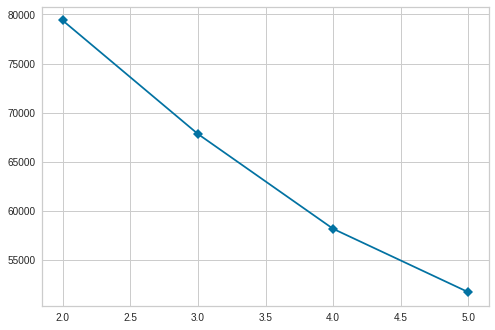

In [27]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,6), metric="distortion", timings=False)

visualizer.fit(X_train)        # Fit the data to the visualizer

/home/sergio/.local/lib/python3.6/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/sergio/.local/lib/python3.6/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)
/home/sergio/.local/lib/python3.6/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f6a0c6887b8>,
                 k=None, locate_elbow=True, metric='distortion', model=None,
                 timings=False)

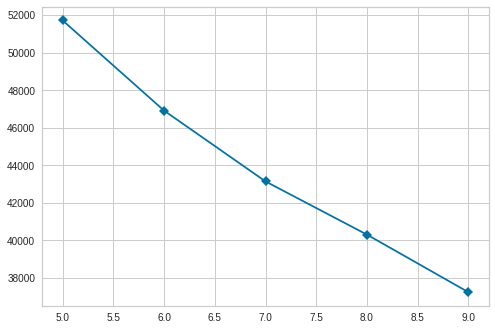

In [28]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(5,10), metric="distortion", timings=False)

visualizer.fit(X_train)  

/home/sergio/.local/lib/python3.6/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/sergio/.local/lib/python3.6/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)
/home/sergio/.local/lib/python3.6/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f6a0c6374a8>,
                 k=None, locate_elbow=True, metric='distortion', model=None,
                 timings=False)

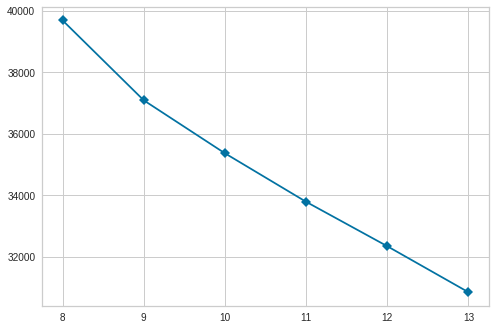

In [29]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(8,14), metric="distortion", timings=False)

visualizer.fit(X_train)  

In [30]:

predKMeans = KMeans(n_clusters=7)

data_trainerKMeans = predKMeans.fit(X_train, y_train)
print(data_trainerKMeans)
y_predKMeans = data_trainerKMeans.predict(X_test)

#Para este formato no se como usar el KMeans supongo que no es el ideal
#Lo aplicamos para hacer la predicción


compareRFC = pd.DataFrame({'Realidad':y_test, 'Predicción':y_predKMeans})
compareRFC.head(10)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


,Realidad,Predicción
3788,Marcus,0
8550,Marcus,3
2306,Esequlius,5
9745,Marcus,4
8426,Philippus,3
1987,Marcus,1
11724,Ubuntius,3
8577,Clarius,3
10577,Ubuntius,3
7057,Marcus,5


#### Vamos a usar la DecisionTreeClassifier

In [31]:
predDTC = DecisionTreeClassifier(random_state=0)

data_trainerDTC = predDTC.fit(X_train, y_train)
y_predDTC = data_trainerDTC.predict(X_test)
print(classification_report(y_test,y_predDTC))

#Lo aplicamos para hacer la predicción
compareDTC = pd.DataFrame({'Realidad':y_test, 'Predicción':y_predDTC})
compareDTC.head(10)


               precision    recall  f1-score   support

      Clarius       0.96      0.98      0.97       466
Coronavirucus       0.99      0.99      0.99       182
    Esequlius       0.96      0.96      0.96        78
       Marcus       0.98      0.97      0.98      1030
     Mongucus       0.98      0.95      0.96       133
   Paithonius       0.94      0.97      0.96       123
    Philippus       0.96      0.97      0.97       276
     Ubuntius       0.98      0.97      0.97       116

     accuracy                           0.97      2404
    macro avg       0.97      0.97      0.97      2404
 weighted avg       0.97      0.97      0.97      2404



,Realidad,Predicción
3788,Marcus,Marcus
8550,Marcus,Marcus
2306,Esequlius,Esequlius
9745,Marcus,Marcus
8426,Philippus,Philippus
1987,Marcus,Philippus
11724,Ubuntius,Ubuntius
8577,Clarius,Clarius
10577,Ubuntius,Ubuntius
7057,Marcus,Marcus


In [32]:
y_predDTC= data_trainerRFC.predict(train_dataAvila2)


#Lo aplicamos para hacer la predicción

compareDTC = pd.DataFrame({'Predicción':y_predDTC})
display(compareDTC)

,Predicción
0,Clarius
1,Esequlius
2,Clarius
3,Marcus
4,Philippus
...,...
8007,Paithonius
8008,Philippus
8009,Marcus
8010,Marcus


In [33]:
compareDTC.to_csv('../data/sample_submissionDTC.csv', header=None)

my_submission = "../data/sample_submissionRFC.csv"
with open(my_submission) as f:
    res = requests.post("http://apila-bible.herokuapp.com/check", files={"csv_data":f.read()})
res.json()
#'accuracy': 0.7886919620569146

{'accuracy': 0.8042935596605092,
 'quote': "It's good, but I'm sure you can do better! Try different models, adjust the hyperparameters, some fine tuning can lead you a long way."}

#### Vamos a usar ahora el CalibratedClassifierCv

In [34]:

predCCV = CalibratedClassifierCV(cv=2, method='isotonic')
    
data_trainerCCV = predCCV.fit(X_train, y_train)   
y_predCCV = data_trainerCCV.predict(X_test)  

print(classification_report(y_test,y_predCCV))
    
#Lo aplicamos para hacer la predicción
compareCCV = pd.DataFrame({'Realidad':y_test, 'Predicción':y_predCCV})
compareCCV.head(10)     


/home/sergio/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


               precision    recall  f1-score   support

      Clarius       0.37      0.18      0.24       466
Coronavirucus       0.81      0.92      0.86       182
    Esequlius       0.00      0.00      0.00        78
       Marcus       0.57      0.92      0.70      1030
     Mongucus       0.89      0.70      0.78       133
   Paithonius       0.00      0.00      0.00       123
    Philippus       0.46      0.33      0.38       276
     Ubuntius       0.00      0.00      0.00       116

     accuracy                           0.58      2404
    macro avg       0.39      0.38      0.37      2404
 weighted avg       0.48      0.58      0.50      2404



/home/sergio/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/sergio/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Realidad,Predicción
3788,Marcus,Marcus
8550,Marcus,Marcus
2306,Esequlius,Marcus
9745,Marcus,Marcus
8426,Philippus,Philippus
1987,Marcus,Marcus
11724,Ubuntius,Clarius
8577,Clarius,Marcus
10577,Ubuntius,Clarius
7057,Marcus,Marcus


#### Voy a usar una GausianaNB ahora

In [35]:


predGaus =  GaussianNB()
    
data_trainerGaus = predGaus.fit(X_train, y_train)   
y_predGaus = data_trainerGaus.predict(X_test)  

print(classification_report(y_test,y_predGaus))
    
#Lo aplicamos para hacer la predicción
compareGaus= pd.DataFrame({'Realidad':y_test, 'Predicción':y_predGaus})
compareGaus.head(10)     


               precision    recall  f1-score   support

      Clarius       0.30      0.47      0.37       466
Coronavirucus       0.65      0.68      0.66       182
    Esequlius       0.12      0.27      0.17        78
       Marcus       0.60      0.10      0.18      1030
     Mongucus       0.65      0.70      0.67       133
   Paithonius       0.19      0.76      0.31       123
    Philippus       0.33      0.10      0.15       276
     Ubuntius       0.20      0.72      0.31       116

     accuracy                           0.32      2404
    macro avg       0.38      0.47      0.35      2404
 weighted avg       0.46      0.32      0.29      2404



,Realidad,Predicción
3788,Marcus,Clarius
8550,Marcus,Ubuntius
2306,Esequlius,Clarius
9745,Marcus,Esequlius
8426,Philippus,Paithonius
1987,Marcus,Marcus
11724,Ubuntius,Ubuntius
8577,Clarius,Paithonius
10577,Ubuntius,Ubuntius
7057,Marcus,Paithonius


## What do I do once I have a prediction?

Once you have already trained your model and made a prediction with it, you are ready to check what is the accuracy of it. 

Save your prediction as a `.csv` file.

In [40]:
#Al final mi mejor predición fue con el Random
predRFC = RandomForestClassifier(n_estimators=200)
data_trainerRFC = predRFC.fit(X_train, y_train)

y_predRFC = data_trainerRFC.predict(X_test)
print(classification_report(y_test,y_predRFC))

#Lo aplicamos para hacer la predicción


compareRFC = pd.DataFrame({'Realidad':y_test, 'Predicción':y_predRFC})
compareRFC.head(10)


               precision    recall  f1-score   support

      Clarius       0.98      0.99      0.99       466
Coronavirucus       1.00      1.00      1.00       182
    Esequlius       1.00      0.99      0.99        78
       Marcus       0.99      1.00      0.99      1030
     Mongucus       1.00      0.99      1.00       133
   Paithonius       1.00      0.93      0.97       123
    Philippus       1.00      0.99      0.99       276
     Ubuntius       1.00      0.99      1.00       116

     accuracy                           0.99      2404
    macro avg       1.00      0.99      0.99      2404
 weighted avg       0.99      0.99      0.99      2404



,Realidad,Predicción
3788,Marcus,Marcus
8550,Marcus,Marcus
2306,Esequlius,Esequlius
9745,Marcus,Marcus
8426,Philippus,Philippus
1987,Marcus,Marcus
11724,Ubuntius,Ubuntius
8577,Clarius,Clarius
10577,Ubuntius,Ubuntius
7057,Marcus,Marcus


Now you are ready to know the truth! Are you good enough to call yourself a pro?

Lucky you have the ultimate **APIla-bible** which give you the chance of checking the accuracy of your predictions as many times as you need in order to become the pro you want to be. 

## How do I post my prediction to the APIla-bible?

Easy peasy! You should only fulfil the path to your prediction `.csv` and run the cell below! 

In [41]:
y_predRFC= data_trainerRFC.predict(train_dataAvila2)


#Lo aplicamos para hacer la predicción

compareRFC = pd.DataFrame({'Predicción':y_predRFC})
display(compareRFC)

,Predicción
0,Clarius
1,Esequlius
2,Clarius
3,Marcus
4,Philippus
...,...
8007,Paithonius
8008,Philippus
8009,Paithonius
8010,Marcus


In [38]:
compareRFC.to_csv('../data/sample_submissionRFC.csv', header=None)

my_submission = "../data/sample_submissionRFC.csv"
with open(my_submission) as f:
    res = requests.post("http://apila-bible.herokuapp.com/check", files={"csv_data":f.read()})
res.json()
# 0.8032950574138792,

{'accuracy': 0.8032950574138792,
 'quote': "It's good, but I'm sure you can do better! Try different models, adjust the hyperparameters, some fine tuning can lead you a long way."}

In [39]:
my_submission = "../data/sample_submission.csv"
with open(my_submission) as f:
    res = requests.post("http://apila-bible.herokuapp.com/check", files={"csv_data":f.read()})
res.json()

{'accuracy': 0.12368946580129805,
 'quote': 'Nope, not good enough. But you shall rise as the glorious phoenix from the ashes of this score and get to the top!'}

![hope-you-enjoy](https://imgs.xkcd.com/comics/machine_learning.png)